In [2]:
import os
import cv2
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from tqdm.notebook import tqdm
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


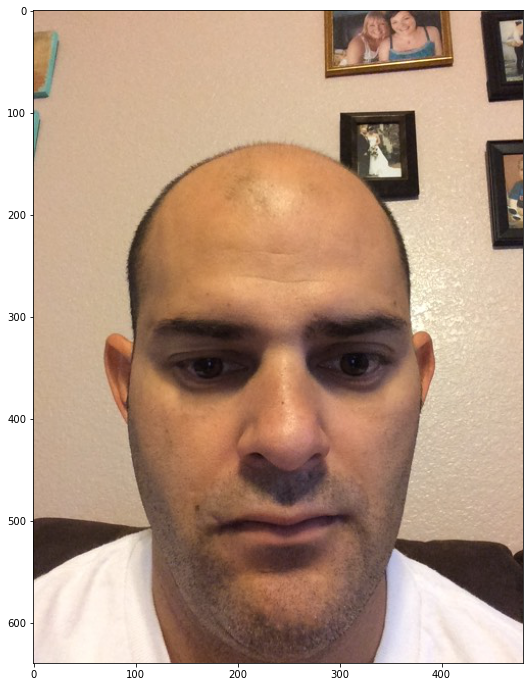

In [19]:
plt.figure(figsize=(16,12))
path = './Data_Mini/frames/00123-00110.jpg'
img = plt.imread(path)
plt.imshow(img);

In [ ]:
results = MTCNN().detect_faces(img)

if len(results) > 1:
    if results[0]['box'][2] > results[1]['box'][2]:
        results.pop(1)
    else:
        results.pop(0)

results

In [ ]:
plt.figure(figsize=(16,12))
ax = plt.gca()
x, y, width, height = results[0]['box']
rect = Rectangle((x, y), width, height, fill=False, color='red')
ax.add_patch(rect)
keypoints = {key: val for key, val in results[0]['keypoints'].items() if not key.startswith('m')}
for key, val in keypoints.items():
    plt.plot(val[0],val[1],'r.')
plt.axis('off')
plt.imshow(img);

In [ ]:
im = cv2.resize(img, (96, 128))
results = MTCNN().detect_faces(im)

if len(results) > 1:
    if results[0]['box'][2] > results[1]['box'][2]:
        results.pop(1)
    else:
        results.pop(0)

results

In [ ]:
plt.figure(figsize=(8,6))
ax = plt.gca()
x, y, width, height = results[0]['box']
rect = Rectangle((x, y), width, height, fill=False, color='red')
ax.add_patch(rect)
keypoints = {key: val for key, val in results[0]['keypoints'].items() if not key.startswith('m')}
for key, val in keypoints.items():
    plt.plot(val[0],val[1],'r.')
plt.imshow(im);

In [ ]:
plt.figure(dpi=150)
ax = plt.gca()
canvas = np.ones((128,96)) * 255
x, y, width, height = results[0]['box']

if x < 0:
    width += x
    x = 0    
if y < 0:
    height += y
    y = 0
if x + width > img.shape[1]:
    width = img.shape[1] - x
if y + height > img.shape[0]:
    height = img.shape[0] - y

canvas[y:y+height, x:x+width] = 0
keypoints = {key: val for key, val in results[0]['keypoints'].items() if not key.startswith('m')}
for key, val in keypoints.items():
    canvas[val[1],val[0]]=255

plt.imshow(canvas, cmap='gray');
# plt.imsave('test.jpg', canvas, cmap='gray')

## Save MTCNN Grids

In [ ]:
with open('./Data_Mini/frames_flat.pkl','rb') as f:
    frames = pickle.load(f)

path = './Data_Mini/frames/'
    
for frame in tqdm(frames):
    img = plt.imread(path+frame)
    img = cv2.resize(img, (96, 128))
    results = MTCNN().detect_faces(img)
    
    l = len(results)
    
    if not l:
        continue
    
    if l > 1:
        if results[0]['box'][2] > results[1]['box'][2]:
            results.pop(1)
        else:
            results.pop(0)

    canvas = np.ones((128,96)) * 255
    x, y, width, height = results[0]['box']

    if x < 0:
        width += x
        x = 0    
    if y < 0:
        height += y
        y = 0
    if x + width > img.shape[1]:
        width = img.shape[1] - x
    if y + height > img.shape[0]:
        height = img.shape[0] - y

    canvas[y:y+height, x:x+width] = 0
    keypoints = {key: val for key, val in results[0]['keypoints'].items() if not key.startswith('m')}
    for key, val in keypoints.items():
        canvas[val[1],val[0]]=255
    
    save = './Data_Mini/grid_mtcnn/'+frame
    plt.imsave(save, canvas, cmap='gray')
    

# Save MTCNN Results for All Frames

In [12]:
# with open('./Data_Mini/frames_flat.pkl','rb') as f:
#     frames = pickle.load(f)

path = './Data_Mini/frames/'
# mtcnns = []
    
for idx, frame in enumerate(frames_left):
    img = plt.imread(path+frame)
    results = MTCNN().detect_faces(img)
    results.append(frame)
    
    mtcnns.append(results)
    
    if not idx % 500:
        with open('./Data_Mini/mtcnn_info.pkl','wb') as f:
            pickle.dump(mtcnns, f)
        print(idx)

0


In [13]:
print(len(mtcnns))

with open('./Data_Mini/mtcnn_info.pkl','wb') as f:
    pickle.dump(mtcnns, f)

9994


In [14]:
with open('./Data_Mini/mtcnn_info.pkl','rb') as f:
    mtccn = pickle.load(f)

In [9]:
with open('./Data_Mini/frames_flat.pkl','rb') as f:
    frames = pickle.load(f)

with open('./Data_Mini/mtcnn_info_9500.pkl','rb') as f:
    mtcnns = pickle.load(f)

len(mtcnns)

9505

In [10]:
mtcnns_done = [item[-1] for item in mtcnns]
len(mtcnns_done)

9505

In [11]:
frames_left = list(set(frames)-set(mtcnns_done))
len(frames_left)

489

### reassurance

In [ ]:
frames_left[9]

In [ ]:
mtcnns[9]

In [ ]:
res = mtcnns[9]
imag = plt.imread('Data_Mini/frames/00010-00317.jpg')
plt.figure(figsize=(16,12))
ax = plt.gca()
x, y, width, height = res[0]['box']
rect = Rectangle((x, y), width, height, fill=False, color='red')
ax.add_patch(rect)
keypoints = {key: val for key, val in res[0]['keypoints'].items() if not key.startswith('m')}
for key, val in keypoints.items():
    plt.plot(val[0],val[1],'r.')
plt.axis('off')
plt.imshow(imag);